In [111]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifie
from sklearn.preprocessing import LabelEncoder

ImportError: cannot import name 'RandomForestClassifie' from 'sklearn.ensemble' (C:\Users\arnoa\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [105]:
import pandas as pd
%store -r accidents_France_2016_2021_

data_accident = accidents_France_2016_2021_.copy()
data_accident


,Num_Acc num_veh,mois,an,lum,dep,agg,int,atm,col,catr,...,sexe,trajet,secu1,secu2,actp,etatp,catv,obsm,occutc,age
0,202100000001 B01,10,5,2,30,0,1,2,1,3,...,1,1,0.0,9.0,0,-1.0,1.0,2.0,0.0,22
1,202100000001 A01,10,5,2,30,0,1,2,1,3,...,1,1,1.0,-1.0,0,-1.0,7.0,9.0,0.0,44
2,202100000002 A01,8,5,1,51,0,3,2,3,3,...,1,3,1.0,-1.0,0,-1.0,7.0,2.0,0.0,39
3,202100000002 B01,8,5,1,51,0,3,2,3,3,...,1,3,1.0,-1.0,0,-1.0,7.0,2.0,0.0,29
4,202100000003 A01,6,5,1,85,1,1,8,6,4,...,1,1,1.0,0.0,0,-1.0,7.0,1.0,0.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767032,201600059431 A01,11,0,1,976,1,3,2,3,2,...,1,3,21.0,0.0,0,0.0,30.0,2.0,0.0,23
767033,201600059431 B01,11,0,1,976,1,3,2,3,2,...,1,3,21.0,0.0,0,0.0,30.0,2.0,0.0,27
767034,201600059432 A01,11,0,1,976,1,6,2,3,2,...,1,0,21.0,0.0,0,0.0,2.0,2.0,0.0,50
767035,201600059432 A01,11,0,1,976,1,6,2,3,2,...,1,3,21.0,0.0,0,0.0,2.0,2.0,0.0,50


In [39]:
 %who 

LabelEncoder	 RandomForestClassifier	 X	 X_test	 X_train	 accidents_France_2016_2021_	 browser_labelEncoder	 clf	 columns	 
country_labelEncoder	 cross_val_predict	 cross_val_score	 data_accident	 pd	 sex_labelEncoder	 source_labelEncoder	 train_test_split	 y	 
y_test	 y_train	 


In [5]:
%whos

Variable   Type      Data/Info
------------------------------
pd         module    <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>


In [106]:
from sklearn.preprocessing import LabelEncoder

In [24]:
#X = data_accident
#y = data_accident['grav']
#source_labelEncoder = LabelEncoder()
##browser_labelEncoder = LabelEncoder()
sex_labelEncoder = LabelEncoder()
country_labelEncoder = LabelEncoder()
X['lum'] = source_labelEncoder.fit_transform(data_accident['lum'])
X['trajet'] = source_labelEncoder.fit_transform(data_accident['trajet'])
X['surf'] = source_labelEncoder.fit_transform(data_accident['surf'])
X['vma'] = source_labelEncoder.fit_transform(data_accident['vma'])
X['age'] = source_labelEncoder.fit_transform(data_accident['age'])
X['agg'] = source_labelEncoder.fit_transform(data_accident['agg'])
X['sexe'] = source_labelEncoder.fit_transform(data_accident['sexe'])

In [41]:
X = pd.get_dummies(X)
#print(X)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Shape du dataset d'entrainement : {} | Shape du dataset de test : {}".format(X_train.shape, X_test.shape))

MemoryError: Unable to allocate 307. GiB for an array with shape (573941, 573941) and data type uint8

# je n'ai pas assez d'espace sur mon ordinateut pour pouvoir contenuer à analyser ma data frame .. je dois chercher une solution... 

In [112]:
data_accident.columns

Index(['Num_Acc num_veh', 'mois', 'an', 'lum', 'dep', 'agg', 'int', 'atm',
       'col', 'catr', 'circ', 'nbv', 'vosp', 'surf', 'infra', 'situ', 'vma',
       'catu', 'grav', 'sexe', 'trajet', 'secu1', 'secu2', 'actp', 'etatp',
       'catv', 'obsm', 'occutc', 'age'],
      dtype='object')

In [113]:
# Define features and target to be used
columns = ['lum', 'trajet', 'grav','atm', 'surf', 'vma', 'age', 'catr','agg']
data_accident2 = data_accident[columns]
data_accident2.head()

,lum,trajet,grav,atm,surf,vma,age,catr,agg
0,2,1,Blessé hospitalisé,2,2,5,22,3,0
1,2,1,Indemne,2,2,5,44,3,0
2,1,3,Blessé léger,2,2,5,39,3,0
3,1,3,Blessé hospitalisé,2,2,5,29,3,0
4,1,1,Indemne,8,2,3,27,4,1


In [114]:
# créer une liste avec l'ordre souhaité des colonnes
new_order = list(data_accident2.columns[:2]) + list(data_accident2.columns[3:]) + ['grav']

# réindexer la dataframe avec le nouvel ordre de colonnes
data_accident2 = data_accident2.reindex(columns=new_order)


In [115]:
data_accident2

,lum,trajet,atm,surf,vma,age,catr,agg,grav
0,2,1,2,2,5,22,3,0,Blessé hospitalisé
1,2,1,2,2,5,44,3,0,Indemne
2,1,3,2,2,5,39,3,0,Blessé léger
3,1,3,2,2,5,29,3,0,Blessé hospitalisé
4,1,1,8,2,3,27,4,1,Indemne
...,...,...,...,...,...,...,...,...,...
767032,1,3,2,2,7,23,2,1,Blessé léger
767033,1,3,2,2,7,27,2,1,Blessé léger
767034,1,0,2,2,7,50,2,1,Blessé léger
767035,1,3,2,2,7,50,2,1,Blessé léger


In [107]:

#X = data_accident2[columns[:-1]]
#y = data_accident2['grav']
#lum_labelEncoder = LabelEncoder()
#trajet_labelEncoder = LabelEncoder()
#surf_labelEncoder = LabelEncoder()
#vma_labelEncoder = LabelEncoder()
#age_labelEncoder = LabelEncoder()
#agg_labelEncoder = LabelEncoder()
#catr_labelEncoder = LabelEncoder()
#atm_labelEncoder = LabelEncoder()
#X['lum'] = source_labelEncoder.fit_transform(data_accident2['lum'])
#X['trajet'] = source_labelEncoder.fit_transform(data_accident2['trajet'])
#X['surf'] = source_labelEncoder.fit_transform(data_accident2['surf'])
#['vma'] = source_labelEncoder.fit_transform(data_accident2['vma'])
#X['age'] = source_labelEncoder.fit_transform(data_accident2['age'])
#X['agg'] = source_labelEncoder.fit_transform(data_accident2['agg'])
#X['catr'] = source_labelEncoder.fit_transform(data_accident2['catr'])
#X['atm'] = source_labelEncoder.fit_transform(data_accident2['atm'])

In [103]:
#X = pd.get_dummies(X)
#print(X)
#from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#print("Shape du dataset d'entrainement : {} | Shape du dataset de test : {}".format(X_train.shape, X_test.shape))

Shape du dataset d'entrainement : (536925, 13) | Shape du dataset de test : (230112, 13)


In [117]:
data_accident2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767037 entries, 0 to 767036
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   lum     767037 non-null  int64 
 1   trajet  767037 non-null  int64 
 2   atm     767037 non-null  int64 
 3   surf    767037 non-null  int64 
 4   vma     767037 non-null  int64 
 5   age     767037 non-null  int64 
 6   catr    767037 non-null  int64 
 7   agg     767037 non-null  int64 
 8   grav    767037 non-null  object
dtypes: int64(8), object(1)
memory usage: 52.7+ MB


In [118]:
X = data_accident2[columns[:-1]]
y = data_accident2['grav']
lum_labelEncoder = LabelEncoder()
trajet_labelEncoder = LabelEncoder()
surf_labelEncoder = LabelEncoder()
vma_labelEncoder = LabelEncoder()
age_labelEncoder = LabelEncoder()
agg_labelEncoder = LabelEncoder()
catr_labelEncoder = LabelEncoder()
atm_labelEncoder = LabelEncoder()


X['lum'] = lum_labelEncoder.fit_transform(data_accident2['lum'])
X['trajet'] = trajet_labelEncoder.fit_transform(data_accident2['trajet'])
X['surf'] = surf_labelEncoder.fit_transform(data_accident2['surf'])
X['vma'] = vma_labelEncoder.fit_transform(data_accident2['vma'])
X['age'] = age_labelEncoder.fit_transform(data_accident2['age'])
X['agg'] = agg_labelEncoder.fit_transform(data_accident2['agg'])
X['catr'] = catr_labelEncoder.fit_transform(data_accident2['catr'])
X['atm'] = atm_labelEncoder.fit_transform(data_accident2['atm'])

In [120]:
X = pd.get_dummies(X)
#print(X)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Shape du dataset d'entrainement : {} | Shape du dataset de test : {}".format(X_train.shape, X_test.shape))

Shape du dataset d'entrainement : (536925, 13) | Shape du dataset de test : (230112, 13)


In [127]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [122]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

TypeError: '<' not supported between instances of 'int' and 'str'

In [129]:
# data_accident2['grav'] = data_accident2['grav'].astype(int)

ValueError: invalid literal for int() with base 10: 'Blessé hospitalisé'

In [130]:
data_accident2['grav'].unique()

array(['Blessé hospitalisé', 'Indemne', 'Blessé léger', 'Tué', -1],
      dtype=object)

In [131]:
print(data_accident2['grav'].unique())


['Blessé hospitalisé' 'Indemne' 'Blessé léger' 'Tué' -1]


In [134]:
data_accident2['grav'].replace({'Blessé hospitalisé': 3, 'Indemne': 1, 'Blessé léger': 2, 'Tué': 4, '-1': 0}, inplace=True)


In [135]:
print(data_accident2['grav'].unique())

[ 3  1  2  4 -1]


In [136]:
data_accident2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767037 entries, 0 to 767036
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   lum     767037 non-null  int64
 1   trajet  767037 non-null  int64
 2   atm     767037 non-null  int64
 3   surf    767037 non-null  int64
 4   vma     767037 non-null  int64
 5   age     767037 non-null  int64
 6   catr    767037 non-null  int64
 7   agg     767037 non-null  int64
 8   grav    767037 non-null  int64
dtypes: int64(9)
memory usage: 52.7 MB


In [137]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [138]:
#cvs
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()
print("L'accuracy moyenne pour 10 'fold cross validation' est {}%".format(round(scores*100,2)))

L'accuracy moyenne pour 10 'fold cross validation' est 100.0%


In [150]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

Text(0.5, 1.0, 'Visualizing Important Features')

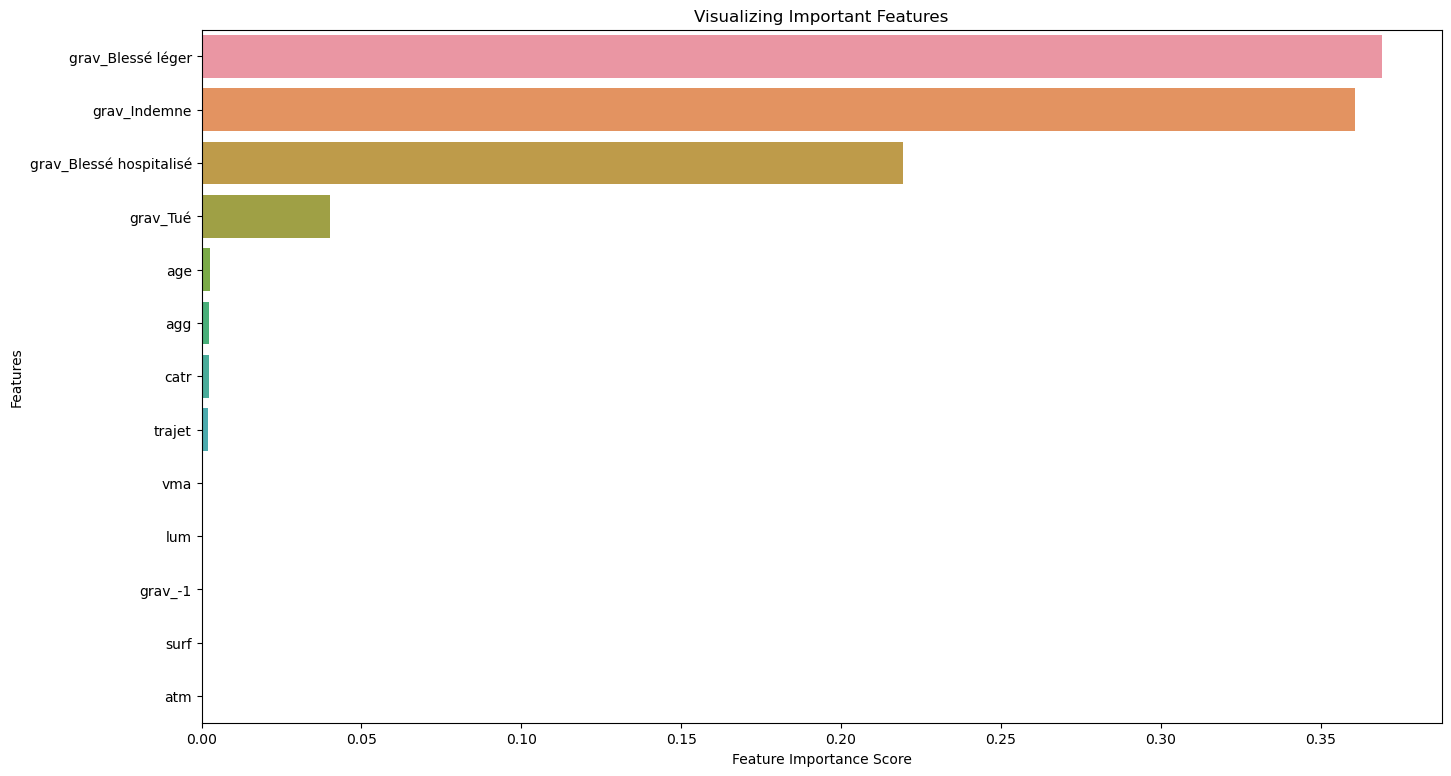

In [151]:
#plot
plt.figure(figsize=(16,9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [139]:
#features importance 
feature_imp = pd.Series(clf.feature_importances_,index=columns[:-1]).sort_values(ascending=False)
feature_imp

ValueError: Length of values (13) does not match length of index (8)

In [141]:
print(data_accident2.columns)


Index(['lum', 'trajet', 'atm', 'surf', 'vma', 'age', 'catr', 'agg', 'grav'], dtype='object')


In [144]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns[:-1]).sort_values(ascending=False)
print("Noms de colonnes : ", X_train.columns[:-1])
print("Longueur de l'index dans feature_imp : ", len(feature_imp.index))

ValueError: Length of values (13) does not match length of index (12)

In [145]:
X_train

,lum,trajet,atm,surf,vma,age,catr,agg,grav_-1,grav_Blessé hospitalisé,grav_Blessé léger,grav_Indemne,grav_Tué
394059,3,4,2,2,1,30,2,0,0,0,1,0,0
674815,1,5,2,2,7,47,2,0,0,0,1,0,0
124618,2,1,2,2,3,58,3,0,0,1,0,0,0
353515,2,3,2,2,3,54,3,1,0,0,1,0,0
37171,1,1,2,2,3,38,2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,1,5,3,3,3,50,3,1,0,0,0,1,0
152315,1,0,2,2,5,40,2,0,0,0,0,1,0
117952,1,8,2,2,6,0,2,0,0,0,0,1,0
435829,3,4,2,2,1,26,3,1,0,0,0,1,0


In [147]:
clf.feature_importances_

array([2.25963666e-04, 2.13172434e-03, 3.09883395e-05, 7.46246519e-05,
       5.05394293e-04, 2.64684973e-03, 2.20528319e-03, 2.47329488e-03,
       1.00683013e-04, 2.19443056e-01, 3.69295005e-01, 3.60686774e-01,
       4.01803593e-02])

In [148]:
feature_imp = pd.Series(clf.feature_importances_,index=columns[:-1]).sort_values(ascending=False)
feature_imp

ValueError: Length of values (13) does not match length of index (8)

In [142]:
print(len(feature_imp.index))

NameError: name 'feature_imp' is not defined

In [149]:
columns[:-1]

['lum', 'trajet', 'grav', 'atm', 'surf', 'vma', 'age', 'catr']

In [143]:
feature_imp = pd.Series(clf.feature_importances_,index=columns[:-1]).sort_values(ascending=False)
print("Noms de colonnes : ", columns[:-1])
print("Longueur de l'index dans feature_imp : ", len(feature_imp.index))


ValueError: Length of values (13) does not match length of index (8)

In [61]:
#y = pd.get_dummies(y, columns=['grav'])


In [64]:
#X = pd.get_dummies(X, columns=['lum', 'trajet', 'surf','vma', 'age','agg','catr','atm'])


In [121]:
data_accident2

,lum,trajet,atm,surf,vma,age,catr,agg,grav
0,2,1,2,2,5,22,3,0,Blessé hospitalisé
1,2,1,2,2,5,44,3,0,Indemne
2,1,3,2,2,5,39,3,0,Blessé léger
3,1,3,2,2,5,29,3,0,Blessé hospitalisé
4,1,1,8,2,3,27,4,1,Indemne
...,...,...,...,...,...,...,...,...,...
767032,1,3,2,2,7,23,2,1,Blessé léger
767033,1,3,2,2,7,27,2,1,Blessé léger
767034,1,0,2,2,7,50,2,1,Blessé léger
767035,1,3,2,2,7,50,2,1,Blessé léger


In [123]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# one-hot encode the categorical variables in the feature matrix
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# one-hot encode the target variable
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# train a random forest classifier on the training data

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# evaluate the classifier on the testing data
y_pred = clf.predict(X_test)


In [124]:
#RandomForest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [88]:
#cvs
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()
print("L'accuracy moyenne pour 10 'fold cross validation' est {}%".format(round(scores*100,2)))

L'accuracy moyenne pour 10 'fold cross validation' est 100.0%


In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')

ValueError: multilabel-indicator is not supported

In [125]:
#features importance 
feature_imp = pd.Series(clf.feature_importances_,index=columns[:-1]).sort_values(ascending=False)
feature_imp

ValueError: Length of values (13) does not match length of index (8)

In [93]:
print(len(columns))

9


In [92]:
#features importance 
feature_imp = pd.Series(clf.feature_importances_,index=columns[:-1]).sort_values(ascending=False)
feature_imp

ValueError: Length of values (13) does not match length of index (8)

In [ ]:
#plot
plt.figure(figsize=(16,9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [73]:
X = data_accident2.drop(['grav'], axis=1)
y = data_accident2['grav']

In [76]:
y

0         Blessé hospitalisé
1                    Indemne
2               Blessé léger
3         Blessé hospitalisé
4                    Indemne
                 ...        
767032          Blessé léger
767033          Blessé léger
767034          Blessé léger
767035          Blessé léger
767036               Indemne
Name: grav, Length: 767037, dtype: object

In [78]:
X

,lum,trajet,atm,surf,vma,age,catr,agg
0,2,1,2,2,5,22,2,0
1,2,1,2,2,5,44,2,0
2,1,3,2,2,5,39,2,0
3,1,3,2,2,5,29,2,0
4,1,1,8,2,3,27,3,1
...,...,...,...,...,...,...,...,...
767032,1,3,2,2,7,23,1,1
767033,1,3,2,2,7,27,1,1
767034,1,0,2,2,7,50,1,1
767035,1,3,2,2,7,50,1,1


In [79]:
#features importance 
feature_imp = pd.Series(clf.feature_importances_,index=X).sort_values(ascending=False)
feature_imp

ValueError: Index data must be 1-dimensional

In [32]:
X = data_accident2
y = data_accident2['grav']
source_labelEncoder = LabelEncoder()
browser_labelEncoder = LabelEncoder()
sex_labelEncoder = LabelEncoder()
country_labelEncoder = LabelEncoder()
X['lum'] = source_labelEncoder.fit_transform(data_accident2['lum'])
X['atm'] = source_labelEncoder.fit_transform(data_accident2['atm'])

NameError: name 'columns' is not defined

In [23]:
#X = pd.get_dummies(X)
#print(X)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#print("Shape du dataset d'entrainement : {} | Shape du dataset de test : {}".format(X_train.shape, X_test.shape))

MemoryError: Unable to allocate 307. GiB for an array with shape (573941, 573941) and data type uint8

In [27]:
X = data_accident
y = data_accident['grav']
X = pd.get_dummies(X, columns=['lum', 'atm'])
#print(X)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Shape du dataset d'entrainement : {} | Shape du dataset de test : {}".format(X_train.shape, X_test.shape))


Shape du dataset d'entrainement : (536925, 44) | Shape du dataset de test : (230112, 44)


In [28]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

ValueError: could not convert string to float: '201800011622 B01'